In [50]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
labour_market = pd.read_csv(r"C:\Users\muham\OneDrive\Projects\House prices and economics\cleaned data (csv)\Labor market clean.csv")

In [52]:
# Create the new DataFrame with only the selected columns
labor_market = labour_market[['Date', 'Labour force (Unemployed)', 'Working-age population %', 'Average hourly earnings (ordinary time and overtime)']]

# Rename the columns for clarity
labor_market.columns = ['Date', 'Unemployed', 'Working-age Population', 'Average Hourly Rate']

labor_market

,Date,Unemployed,Working-age Population,Average Hourly Rate
0,31/03/2024,134,3.1,41.03
1,31/12/2023,123,3.3,40.90
2,30/09/2023,120,3.0,40.46
3,30/06/2023,110,2.4,39.60
4,31/03/2023,103,1.6,39.01
...,...,...,...,...
116,31/03/1995,121,1.5,15.23
117,31/12/1994,135,1.4,15.12
118,30/09/1994,140,1.4,15.05
119,30/06/1994,149,1.3,15.06


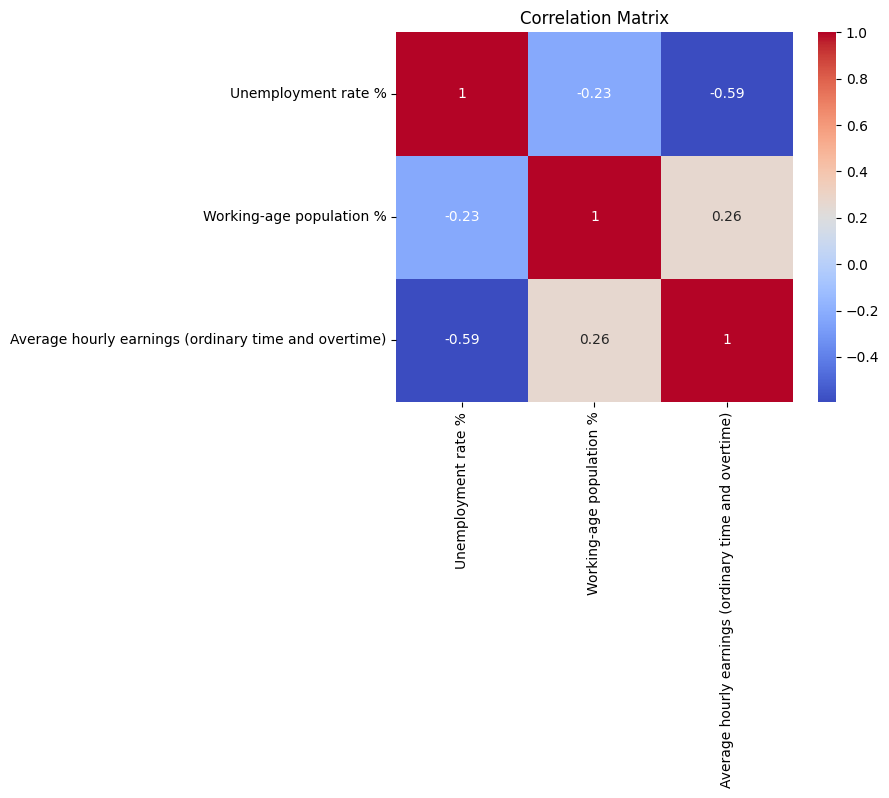

In [53]:
# Calculate correlation matrix
correlation_matrix = labour_market[['Unemployment rate %', 'Working-age population %', 'Average hourly earnings (ordinary time and overtime)']].corr()

# Display correlation matrix
correlation_matrix

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Analaysis Part 1

In [55]:
import statsmodels.api as sm

# Define independent and dependent variables
X = labour_market[['Average hourly earnings (ordinary time and overtime)','Working-age population %']]
y = labour_market['Unemployment rate %']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Unemployment rate %   R-squared:                       0.358
Model:                             OLS   Adj. R-squared:                  0.348
Method:                  Least Squares   F-statistic:                     32.96
Date:                 Sun, 21 Jul 2024   Prob (F-statistic):           4.26e-12
Time:                         13:47:11   Log-Likelihood:                -177.94
No. Observations:                  121   AIC:                             361.9
Df Residuals:                      118   BIC:                             370.3
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

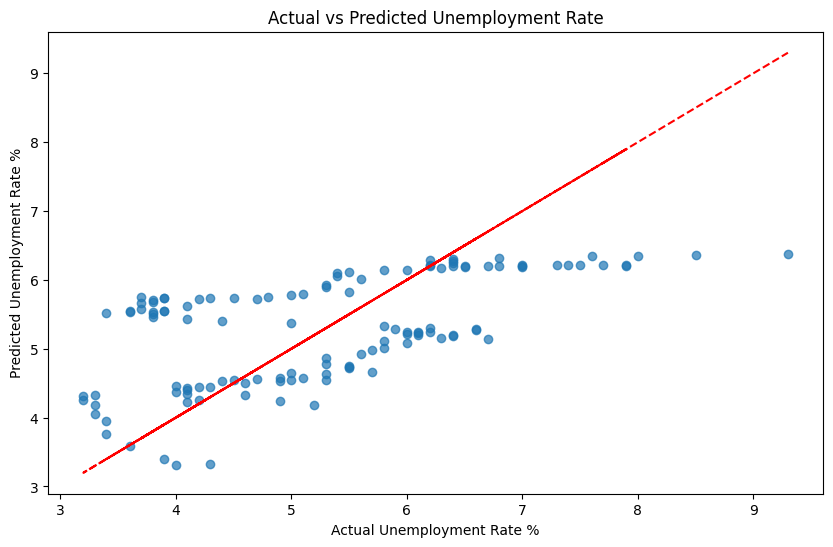

In [56]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, model.predict(X), alpha=0.7)
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel('Actual Unemployment Rate %')
plt.ylabel('Predicted Unemployment Rate %')
plt.title('Actual vs Predicted Unemployment Rate')
plt.show()


Here's a breakdown of the results in simple terms:

Key Metrics
* R-squared (0.358): Indicates that about 35.8% of the variability in unemployment rate is explained by the model. This suggests a moderate relationship.

* Adjusted R-squared (0.348): Slightly lower than R-squared, accounting for the number of predictors. It confirms the model's moderate explanatory power.

* F-statistic (32.96, p-value: 4.26e-12): The model is statistically significant, meaning at least one predictor is related to the unemployment rate.

Coefficients
* Constant (8.165): The intercept value when all predictors are zero. Not directly interpretable in this context.

* Average hourly earnings (-0.1069): For each unit increase in average hourly earnings, the unemployment rate decreases by about 0.11%, holding other factors constant. This is statistically significant (p < 0.05).

* Working-age population (-0.1464): Not statistically significant (p = 0.317), suggesting this variable doesn't have a meaningful impact on unemployment rate in this model.

Residual Analysis
* Durbin-Watson (0.102): Indicates possible autocorrelation in residuals, which could be a concern.
Conclusion

#### Conclusion

The model shows that average hourly earnings have a significant inverse relationship with the unemployment rate, while the working-age population percentage doesn't have a significant impact in this dataset.

# Regression Analaysis part 2

Mean Squared Error: 1.11
R-squared: 0.36
Coefficients: [-0.10685622 -0.14639481]
Intercept: 8.164953566046185


Text(0.5, 1.0, 'Actual vs Predicted HPI')

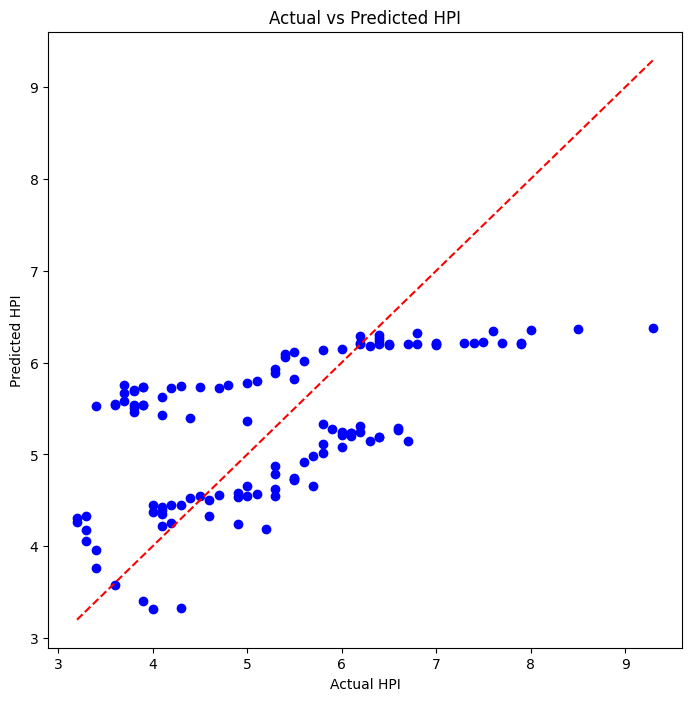

In [58]:
X = labour_market[['Average hourly earnings (ordinary time and overtime)','Working-age population %']]
y = labour_market['Unemployment rate %']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot regression results
plt.figure(figsize=(18, 8))

# Plot actual vs predicted house price index
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual HPI')
plt.ylabel('Predicted HPI')
plt.title('Actual vs Predicted HPI')


### Feature engineering

Lagged variables are a technique used in time series analysis. They incorporate past values of a feature (in this case, unemployment rate and average hourly rate) as additional features for prediction. The idea is that past values can influence future values. By including lagged features, the model can learn from historical trends and potentially make better predictions.

Two new columns are added to the labor_market dataframe:
* Lag_Unemployed: This contains the value of the Unemployed column shifted by one position. So, it represents the unemployment rate from the previous period.
* Lag_Average Hourly Rate: Similar to above, this contains the lagged value of Average Hourly Rate, representing the average hourly rate from the previous period.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Feature engineering: Adding lagged variables
labor_market['Lag_Unemployed'] = labor_market['Unemployed'].shift(1)
labor_market['Lag_Average Hourly Rate'] = labor_market['Average Hourly Rate'].shift(1)

# Drop missing values created by shifting
labor_market = labor_market.dropna()

# Define independent and dependent variables
X = labor_market[['Average Hourly Rate', 'Working-age Population', 'Lag_Unemployed', 'Lag_Average Hourly Rate']]
y = labor_market['Unemployed']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Evaluate model
y_pred = ridge_model.predict(X_test)
print(f'R-squared: {ridge_model.score(X_test, y_test)}')

R-squared: 0.8808890375051608


C:\Users\muham\AppData\Local\Temp\ipykernel_21320\1766231857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_market['Lag_Unemployed'] = labor_market['Unemployed'].shift(1)
C:\Users\muham\AppData\Local\Temp\ipykernel_21320\1766231857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_market['Lag_Average Hourly Rate'] = labor_market['Average Hourly Rate'].shift(1)


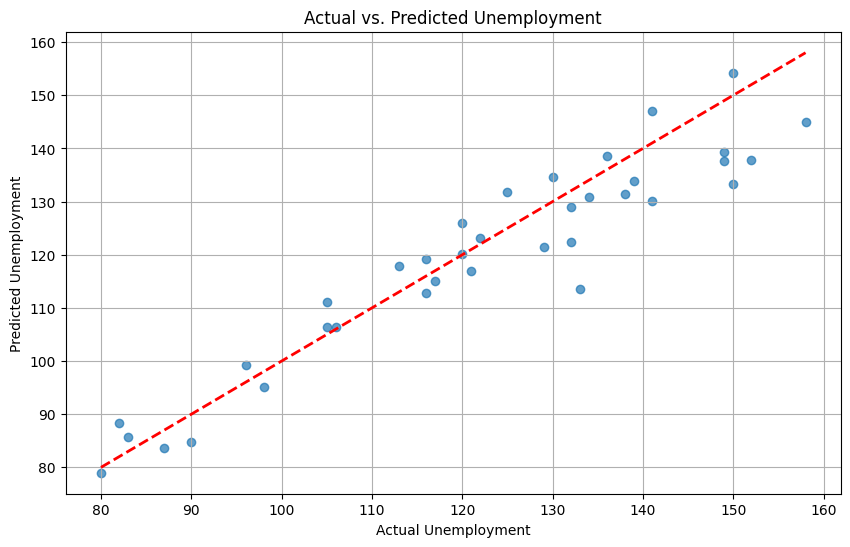

In [61]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Unemployment')
plt.ylabel('Predicted Unemployment')
plt.title('Actual vs. Predicted Unemployment')
plt.grid(True)
plt.show()

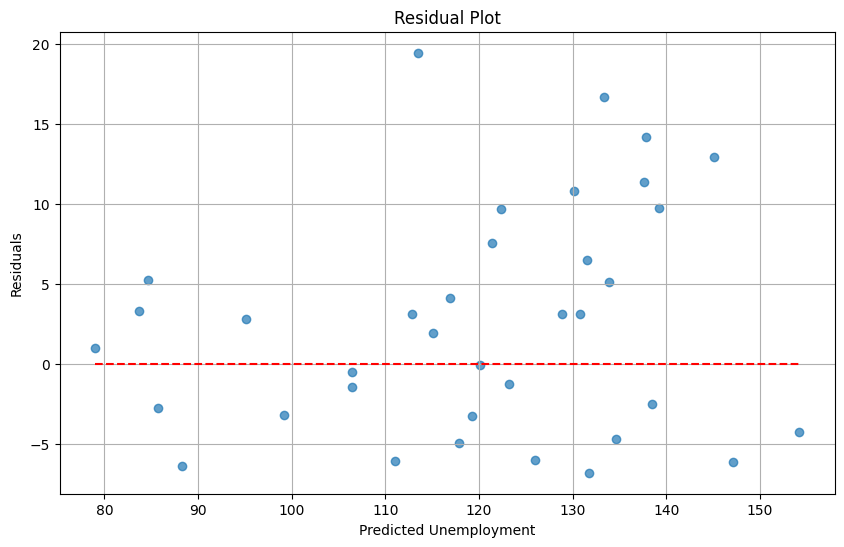

In [62]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Unemployment')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

Random scatter around zero: This indicates a good model fit. The errors (residuals) are evenly distributed around zero, with no significant patterns. This suggests that the model's predictions are unbiased and don't consistently overestimate or underestimate unemployment rates.

In conclusion, the residual plot is a valuable tool to diagnose potential issues with your Ridge regression model. By analyzing the distribution of residuals, you can identify areas for improvement and potentially refine your model for better unemployment rate predictions.

In [63]:
# Calculate predictions
y_pred = ridge_model.predict(X_test)

# Calculate R-squared
r_squared = ridge_model.score(X_test, y_test)
print(f'R-squared: {r_squared:.4f}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Print model coefficients
coefficients = ridge_model.coef_
feature_names = ['Average Hourly Rate', 'Working-age Population', 'Lag_Unemployed', 'Lag_Average Hourly Rate']
for feature, coef in zip(feature_names, coefficients):
    print(f'Coefficient for {feature}: {coef:.4f}')

R-squared: 0.8809
Mean Squared Error: 55.1839
Coefficient for Average Hourly Rate: 1.4183
Coefficient for Working-age Population: -0.0082
Coefficient for Lag_Unemployed: 19.5814
Coefficient for Lag_Average Hourly Rate: -2.3362


#### Definition of the results

* R-squared: 0.8809: The model explains 88% of the changes in the data. It’s a good fit.
* Mean Squared Error (MSE): 55.1839: On average, the predictions are off by about 55 units squared.
* Coefficient for Average Hourly Rate: 1.4183: If the average hourly rate goes up by 1 unit, the outcome increases by 1.42 units.
* Coefficient for Working-age Population: -0.0082: If the working-age population goes up by 1 unit, the outcome decreases slightly by 0.0082 units.
* Coefficient for Lag_Unemployed: 19.5814: If the number of unemployed from before goes up by 1 unit, the outcome increases a lot, by 19.58 units.
* Coefficient for Lag_Average Hourly Rate: -2.3362: If the average hourly rate from before goes up by 1 unit, the outcome goes down by 2.34 units.